In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Clemens
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/My_Data/MentalHealthDataset.csv'
df=pd.read_csv(path)

In [ ]:
# Maria
path = r'C:\Users\merkm\Dropbox\!IronHack\Week 3 - First Project\Mental_Health_Dataset.csv'
df = pd.read_csv(path)

In [ ]:
import requests
from bs4 import BeautifulSoup
url = "https://en.wikipedia.org/wiki/List_of_countries_by_alcohol_consumption_per_capita"
response = requests.get(url)

In [ ]:
soup = BeautifulSoup(response.content)

In [ ]:
alcohols = soup.find_all("td")

In [ ]:
alcohols_data = [x.get_text() for x in alcohols]

In [ ]:
alcohols_data

In [ ]:
sliced_alcohol_2016=alcohols_data[2:766:2] # Liste zuschneiden zu Allen Ländernamen und Werten für 2016. Abschneiden der zweiten Tabelle

alc_countries=sliced_alcohol_2016[::2] #Alle Ländernamen

alc_countries_clean=[(x[1:]).lower() for x in alc_countries] #Alle Ländernamen klein geschrieben und ohne komisches formatting

alc_countries_clean = list(map(lambda x: "switzerland" if x == '\xa0switzerland' else "nepal" if x=="\xa0\xa0nepal" else x, alc_countries_clean))

alc_values=sliced_alcohol_2016[1::2] #Alle Alkoholwerte

alc_values_clean=[float(x[:-2].strip()) if x[:-2].strip() else None for x in alc_values] #Alle Alkoholwerte als float, Vorsicht bei Null values

country_alcohol_dict = {country: value for country, value in zip(alc_countries_clean, alc_values_clean)} #Erstelle ein dictionary aus zwei Listen

In [ ]:
country_alcohol_dict

In [ ]:
df

In [ ]:
df.columns = [name.lower() for name in df.columns]

#lowercase_map={} # Eine Map die die Ländernamen in der Spalte "country" in lowercase umbenennen kann. {"Afghanistan":"afghanistan"}
#for i in df["country"].unique():
 #   lowercase_map[i]=i.lower()
  #df["country"]=df["country"].map(lowercase_map)

df['country'] = df['country'].str.lower()


In [ ]:
df

In [ ]:
country_alcohol_dict.keys()

In [ ]:
df["country"].unique()

In [ ]:
df

In [ ]:
df["average_alcohol_consumption_in_country"] = [country_alcohol_dict[x] for x in df["country"]]

In [ ]:
# Happiness index
url2 = "https://www.theglobaleconomy.com/rankings/happiness/"
response2 = requests.get(url2)
response2

In [ ]:
soup2 = BeautifulSoup(response2.content)

In [ ]:
print(soup2.prettify())

In [ ]:
happiness_source = soup2.find_all("td")

In [ ]:
happiness_raw_data = [x.get_text() for x in happiness_source]

In [ ]:
happiness_raw_data

In [ ]:
happiness_countries = happiness_raw_data[::4]
#start, ende, increment

In [ ]:
happiness_countries

In [ ]:
country_list = list()
for country in happiness_countries: # Since country is a string, we can directly use it without getText()
    countries = country[1:-1].lower() # Remove the first and last character
    country_list.append(countries)
country_list

country_list = list(map(lambda x: "united states" if x == 'usa' else "united kingdom" if x=="uk" else "bosnia and herzegovina" if x=="bosnia & herz." else "czech republic" if x=="czechia" else x, country_list))

In [ ]:
country_list

In [ ]:
happiness_index = happiness_raw_data[1::4]

In [ ]:
happiness_index

In [ ]:
index_list = list()
for i in happiness_index:
    index = i.replace("\r\n\t\t\t\t\t\t\t\t", "")
    index_list.append(float(index))
index_list

In [ ]:
# Combining the two scraped lists in a dictionary
country_happiness_dict = {country: value for country, value in zip(country_list, index_list)}

In [ ]:
country_happiness_dict # result of web scraping is a sorted dictionary of country happiness indeces

In [ ]:
df["happiness_index"] = [country_happiness_dict[x] for x in df["country"]]

In [ ]:
df

In [ ]:
df["happiness_index"].value_counts()

In [ ]:
# Cleaning merged data set (after deciding not to scrape work-life-balance additionally)
df.isna().sum()

In [ ]:
# self-employed is only column with NAs (5202) - drop it because we do not need it anyway?
df = df.dropna(axis=1)

In [ ]:
df

In [ ]:
# checking for duplicates
df.duplicated().any()

In [ ]:
df.duplicated().sum() # 2313 duplicates found

In [ ]:
df

In [ ]:
# Drop following columns without desription or use for our analysis:
# care_options, social_weakness, work_interest, coping_struggles, changes_habits, mental_health_history, growing_stress, self_employed (also NAs), time stamp
df_cleaned = df.drop(['care_options', 'social_weakness', 'work_interest', 'coping_struggles', 'changes_habits', 'mental_health_history', 'growing_stress', 'timestamp'], axis=1)

In [ ]:
df_cleaned # successfully reduced to 10 columns

In [ ]:
# Visualisations
# 1. Scatterplot: x- happiness, y - treatment % --> countries are data points - maria
# 2. x- days in doors cat, y- happiness per country - clemens
# 3. Scatterplot x- alc y- treatment % - maria
# 4. barchart stacked: x- family history, y- treatment count - clemens
# 5. percentage therapy by country (which country most/ less - calculated by percenatge yes/ no within country group,. pivot table) - maria
# 6. mood swings + alcohol - clemens

In [ ]:
df_cleaned.columns

In [ ]:
# 4. barchart stacked: x- family history, y- treatment count - clemens
history_counts=df.groupby(["family_history","treatment"]).size()
history_counts

In [ ]:
df_cleaned

In [ ]:

# 6. mood swings + alcohol - clemens

# df_moods=df_cleaned.groupby(["country","mood_swings"])["mood_swings"].count()
# type(df_moods)

# Filter the DataFrame to include only rows where mood_swings is "High"
high_mood_df = df_cleaned[df_cleaned['mood_swings'] == 'High']

# Group the filtered DataFrame by country and count the occurrences of "High"
country_high_counts = high_mood_df.groupby('country')['mood_swings'].count()
# Rename the columns for better clarity
#country_high_counts.columns = ['country', 'high_mood_count']

# Display the resulting DataFrame
#print(country_high_counts)
country_counts=df_cleaned.groupby("country").size()
high_perc={}
for j in list(country_high_counts.keys()):
  high_perc[j]=(country_high_counts[j]/country_counts[j])

high_perc

df_alcohol=df_cleaned.pivot_table(index="country",values="average_alcohol_consumption_in_country")
df_alcohol["high_moodsw_perc"] = df_alcohol.index.map(high_perc)
df_alcohol


In [ ]:
# 2. x- days in doors cat, y- happiness per country - clemens.

# APARRENTLY the data are all pretty much 20% across the board for all the answers. All countries answer the question in he same pattern.

indoors_df=df_cleaned.groupby(["country","days_indoors"])["days_indoors"].count()
indoors_df


In [ ]:
indoor_score={}
for i in indoors_df.keys()[:-1:5]:

  #print(f"{i[0]} + score {indoors_df[i]} *7 " )
  indoor_score[i[0]]=(7*indoors_df[i])

for i in indoors_df.keys()[1:-1:5]:

  #print(f"{i[0]} + score {indoors_df[i]} *22" )
  indoor_score[i[0]]+=(22*indoors_df[i])

for i in indoors_df.keys()[2:-1:5]:

  #print(f"{i[0]} + score {indoors_df[i]} *46" )
  indoor_score[i[0]]+=(46*indoors_df[i])

for i in indoors_df.keys()[4:-1:5]:

  #print(f"{i[0]} + score {indoors_df[i]} * 90" )
  indoor_score[i[0]]+=(90*indoors_df[i])

indoor_score



In [ ]:
indoor_counts=df_cleaned.groupby("country").size()
indoor_counts
avg_indoor={}
for j in list(indoor_score.keys()):
  avg_indoor[j]=(indoor_score[j]/indoor_counts[j])

In [ ]:
df_cleaned.keys()

In [ ]:
df_happ_ind=df_cleaned.pivot_table(index="country",values="happiness_index")

In [ ]:
df_happ_ind["avg_indoor_score"] = df_happ_ind.index.map(avg_indoor)

In [ ]:
df_happ_ind

In [ ]:
# Visualisations Maria (begin of second merge part Thursday)
# 1. Scatterplot: x- happiness, y - treatment % --> countries are data points - maria - done
# 2. x- days in doors cat, y - happiness per country - clemens 
# 3. Scatterplot x- alc y- treatment % - maria
# 4. barchart stacked: x- family history, y- treatment count - clemens 
# 5. percentage treatment by country (which country most/ less - calculated by percenatge yes/ no within country group,. pivot table) - maria - done
# 6. mood swings + alcohol - clemens

In [ ]:
df_cleaned["country"].value_counts()

In [ ]:
# treatment column with integer (dummy column), then group by country 
df_cleaned["treatment_binary"] = df_cleaned["treatment"].apply(lambda x: 1 if x == "Yes" else 0 if x == "No" else x )

In [ ]:
treatment_mean_country = df_cleaned.groupby("country")["treatment_binary"].mean().sort_values() 

In [ ]:
df_cleaned

In [ ]:
treatment_df = pd.DataFrame(treatment_mean_country).reset_index() # percentage of treatment per country sorted 

In [ ]:
treatment_df.columns = ["country","treatment_pct"]

In [ ]:
df_cleaned = pd.merge(df_cleaned, treatment_df, on = "country") # added the new treatment percentage variable as a column in the dataframe 

In [ ]:
# Plotting treatment rate by country (with all values, not onyl > 0)

treatment_mean_country.plot(kind='barh', figsize=(8, 10), color='skyblue')

plt.title("Average Treatment Rate by Country (Sorted)", fontsize=16)
plt.xlabel("Average Treatment Rate", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Plotting treatment rate by country 

treatment_mean_country_nonzero = treatment_mean_country[treatment_mean_country > 0]

treatment_mean_country_nonzero.plot(kind='barh', figsize=(8, 10), color='skyblue')

plt.title("Average Treatment Rate by Country (Sorted)", fontsize=16)
plt.xlabel("Average Treatment Rate", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
df_cleaned

C:\Users\merkm\AppData\Local\Temp\ipykernel_33112\3982710307.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout() # ensures the plot and legend fit well within the figure (but not applied starting from 3 legend columns here)


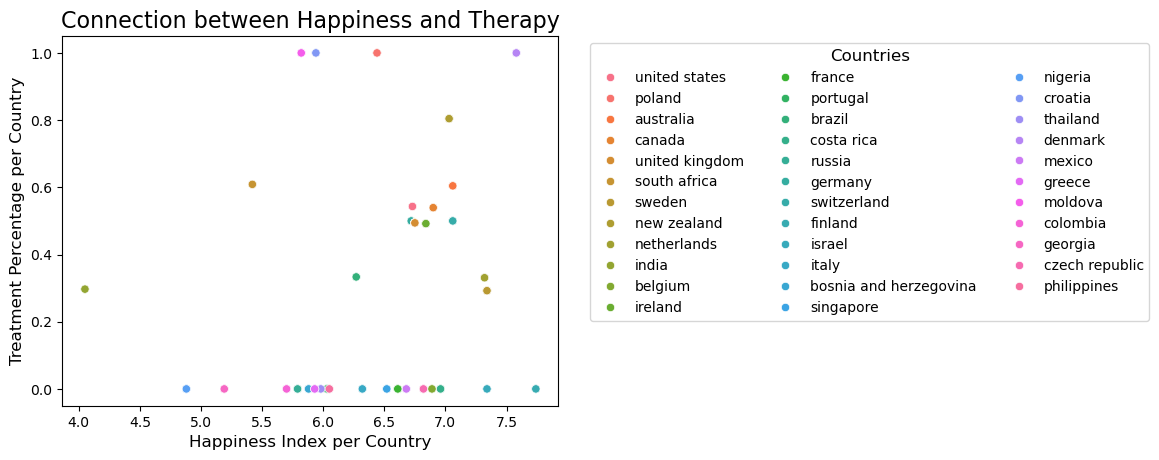

In [182]:
# Scatterplot: x = happiness + y = treatment percent 
sns.scatterplot(x = "happiness_index", y = "treatment_pct", hue="country", data = df_cleaned)

plt.title("Connection between Happiness and Therapy", fontsize=16)
plt.xlabel("Happiness Index per Country", fontsize=12)
plt.ylabel("Treatment Percentage per Country", fontsize=12)

plt.legend(title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12, ncol=3) # legend position outside plot + multiple columns countries

plt.tight_layout() # ensures the plot and legend fit well within the figure (but not applied starting from 3 legend columns here)
plt.show()

C:\Users\merkm\AppData\Local\Temp\ipykernel_33112\3675502780.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


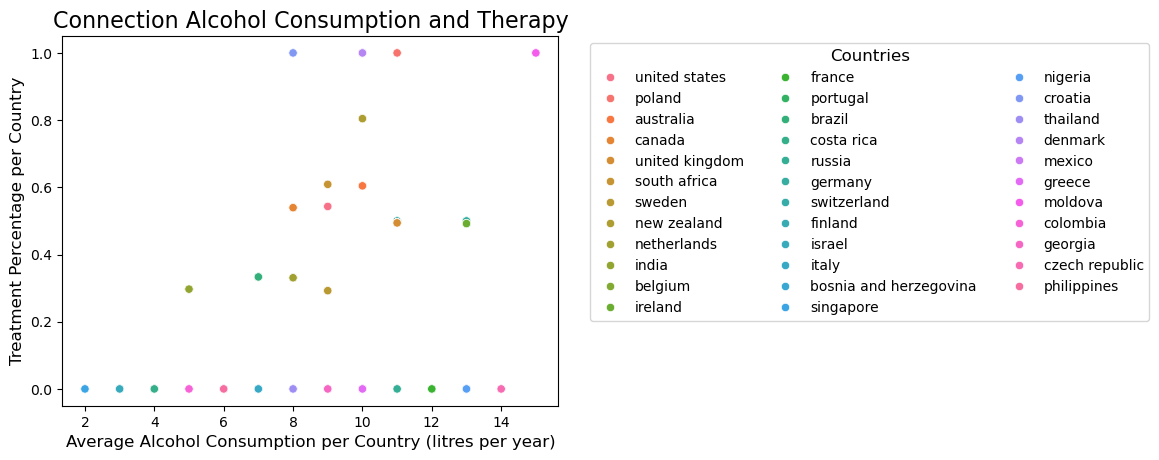

In [184]:
# Scatterplot x- average_alcohol_consumption_in_country y- treatment % in country 
sns.scatterplot(x = "average_alcohol_consumption_in_country", y = "treatment_pct", hue="country", data = df_cleaned)

plt.title("Connection Alcohol Consumption and Therapy", fontsize=16)
plt.xlabel("Average Alcohol Consumption per Country (litres per year)", fontsize=12)
plt.ylabel("Treatment Percentage per Country", fontsize=12)

plt.legend(title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12, ncol=3)

plt.tight_layout()
plt.show()